[Index](Index.ipynb) - [Sinogram mashing](2015_08_27_Presentation_Lab_Mashing.ipynb) - [Cylindrical Phantom](2015_08_27_01_Presentation_Lab_Cylinder.ipynb)

#GATING INFORMATION - Biograph mMR 

In [6]:
import occiput
import mMR

##LOAD PHYSIO FILE

In [7]:
physio_file = '/scratch/data/PET_data/cardiac/IRIDAZ_20150720_15_07_20-14_05_05-DST-1_3_12_2_1107_5_2_38_51006/3.IMA'
physio = occiput.DataSources.FileSources.load_physiological_data_siemens(physio_file) 

##LOAD LISTMODE TRIGGERS

In [10]:
listmode_file = '/scratch/data/PET_data/cardiac/IRIDAZ_20150720_15_07_20-14_05_05-DST-1_3_12_2_1107_5_2_38_51006/listmode.l'
mmr = mMR.PET_Interface_mMR()
mmr.load_gates(listmode_file,time_range_ms=[0,60000])
gates = mmr.get_gates()

PLOT RESPIRATORY SIGNAL AND TRIGGERS

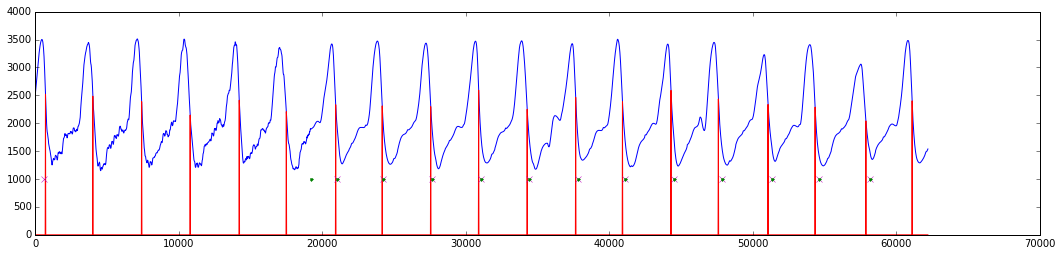

In [11]:
time_gates_br_on  = gates['time'][gates['payload']==4096]
time_gates_br_off = gates['time'][gates['payload']==4097]

figure(figsize=[18,4])
hold(0)
t1 = linspace(0,1000.0/50*len(physio['samples_breathing']),len(physio['samples_breathing']))
plot(t1,physio['samples_breathing'])
hold(1)
t2 = linspace(0,1000.0/50*len(physio['triggers_breathing']),len(physio['triggers_breathing']))
plot(t2,physio['triggers_breathing'],'r')
plot(time_gates_br_on,1000*ones(time_gates_br_off.shape),'xm')
plot(time_gates_br_off,1000*ones(time_gates_br_on.shape),'.g')

## CALIBRATE CLOCK

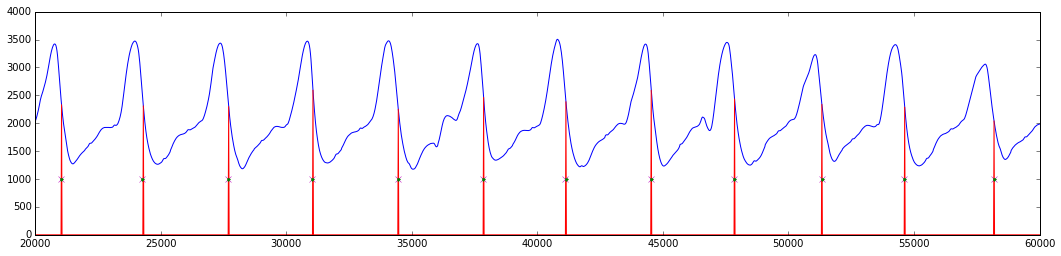

In [12]:
figure(figsize=[18,4])
hold(0)

min_time = 20000
max_time = 60000

sa = physio['samples_breathing']
tr = physio['triggers_breathing']
tsa = linspace(0,1000.0/50 *402/400 *len(sa),len(sa))
ttr = linspace(0,1000.0/50 *402/400 *len(tr),len(tr))
tgon  = time_gates_br_on
tgoff = time_gates_br_off
gon  = 1000*ones(tgon.shape)
goff = 1000*ones(tgoff.shape)

sa  = sa[(tsa>min_time)*(tsa<max_time)]
tsa = tsa[(tsa>min_time)*(tsa<max_time)]
tr  = tr[(ttr>min_time)*(ttr<max_time)]
ttr = ttr[(ttr>min_time)*(ttr<max_time)]
gon  = gon[(tgon>min_time)*(tgon<max_time)]
tgon = tgon[(tgon>min_time)*(tgon<max_time)]
goff  = goff[(tgoff>min_time)*(tgoff<max_time)]
tgoff = tgoff[(tgoff>min_time)*(tgoff<max_time)]

hold(1)
plot(tsa,sa)
plot(ttr,tr,'r')
plot(tgon,gon,'xm')
plot(tgoff,goff,'.g')

## CYCLICAL BINNING

In [ ]:
N_cycles = 100
N_frames_per_cycle = 16
time_bins = zeros(N_cycles, N_frames_per_cycle, 2, dtype=int32)
#time_bins[...] = ...
listmodefile = '/scratch/data/PET_data/cardiac/THO_MRAC_PET_60MIN_RAW_DATA_0042/listmode.l.hdr'

pet = occiput.Reconstruction.PET.PET_Cyclic_Scan()
pet.load_listmode_file(listmodefile,time_bins)